## Raditya Sebastian
## 1306620042

Library

In [ ]:
import sys
!{sys.executable} -m pip install scikeras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from scikeras.wrappers import KerasClassifier
from scipy.stats import loguniform


Fungsi yang akan membaca data dan menghitung gradien dan maksimum gradien

In [ ]:
def data_reader(data_files):
  df = pd.read_csv(data_files)
  df = df.drop('time(s)',axis=1)
  cols =[]
  cols =df.columns
  F1 = 0
  F2 = 0
  F3 = 0
  F4 = 0
  F5 = 0
  F6 = 0
  F7 = 0
  F8 = 0
  F9 = 0
  F10 = 0

  for names in cols:
    grad_max = np.argmax(np.abs(np.gradient(df[names])))
    if names =='F1':
      F1 = grad_max
    elif names =='F2':
      F2 = grad_max
    elif names =='F3':
      F3 = grad_max
    elif names =='F4':
      F4 = grad_max
    elif names =='F5':
      F5 = grad_max
    elif names =='F6':
      F6 = grad_max
    elif names =='F7':
      F7 = grad_max
    elif names =='F8':
      F8 = grad_max
    elif names =='F9':
      F9 = grad_max
    elif names =='F10':
      F10 = grad_max
  return F1,F2,F3,F4,F5,F6,F7,F8,F9,F10



Aplikasi kan fungsi

In [ ]:
#A
F1 = []
F2 = []
F3 = []
F4 = []
F5 = []
F6 = []
F7 = []
F8 = []
F9 = []
F10 = []
group =[]
for i in range(0,35):
  f1,f2,f3,f4,f5,f6,f7,f8,f9,f10 =data_reader(f'/content/Data_Files/_A_{i+1}_crop1030.csv')
  F1.append(f1)
  F2.append(f2)
  F3.append(f3)
  F4.append(f4)
  F5.append(f5)
  F6.append(f6)
  F7.append(f7)
  F8.append(f8)
  F9.append(f9)
  F10.append(f10)
  group.append('A')

In [ ]:
#B
for i in range(0,35):
  f1,f2,f3,f4,f5,f6,f7,f8,f9,f10, =data_reader(f'/content/Data_Files/_B_{i+1}_crop1030.csv')
  F1.append(f1)
  F2.append(f2)
  F3.append(f3)
  F4.append(f4)
  F5.append(f5)
  F6.append(f6)
  F7.append(f7)
  F8.append(f8)
  F9.append(f9)
  F10.append(f10)
  group.append('B')

In [ ]:
data = {'F1':F1,
        'F2':F2,
        'F3':F3,
        'F4':F4,
        'F5':F5,
        'F6':F6,
        'F7':F7,
        'F8':F8,
        'F9':F9,
        'F10':F10,
        'Label':group
        }

In [ ]:
df = pd.DataFrame(data)
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Label
0,53,79,3,30,35,30,29,31,30,24,A
1,42,71,200,27,30,29,27,27,26,20,A
2,63,76,5,35,39,32,28,36,32,27,A
3,56,76,5,32,36,33,36,34,30,25,A
4,50,71,64,27,32,29,20,29,27,21,A
...,...,...,...,...,...,...,...,...,...,...,...
65,51,93,72,31,34,31,22,30,28,22,B
66,46,90,0,26,32,29,3,26,23,19,B
67,49,92,1,28,32,30,29,28,26,20,B
68,47,84,74,26,32,27,30,26,24,20,B


In [ ]:
df.to_csv("/content/data_gradmax_2c10d70.csv")

Mengecek NaN

In [ ]:
df.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
Label    0
dtype: int64

Mengubah Outlier menjadi nilai minimal atau maximum

Text(0.5, 1.0, 'Sebelum di ubah')

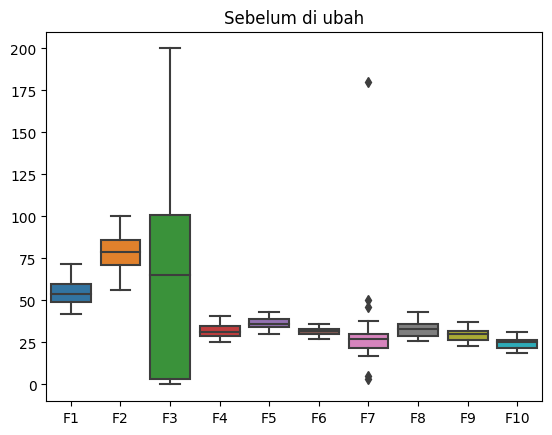

In [ ]:
cols = []
cols =df.columns
sns.boxplot(df[cols[:-1]])
plt.title("Sebelum di ubah")

In [ ]:
q1 = df["F7"].quantile(0.25)
q2 = df["F7"].quantile(0.75)
IQR = q2 - q1
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR)
df['F7'] = pd.DataFrame(np.where(df["F7"] > max_limit, max_limit,
         (np.where(df["F7"] < min_limit, min_limit, df["F7"]))), columns=["F7"])

Text(0.5, 1.0, 'Sesudah di ubah')

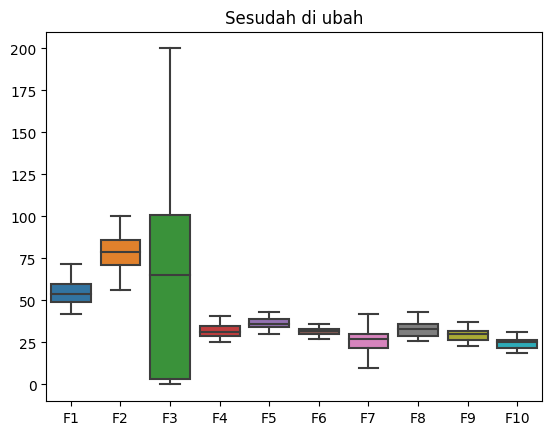

In [ ]:
sns.boxplot(df[cols[:-1]])
plt.title("Sesudah di ubah")

Mengecek keseimbangan sample label

(array([35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 35.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

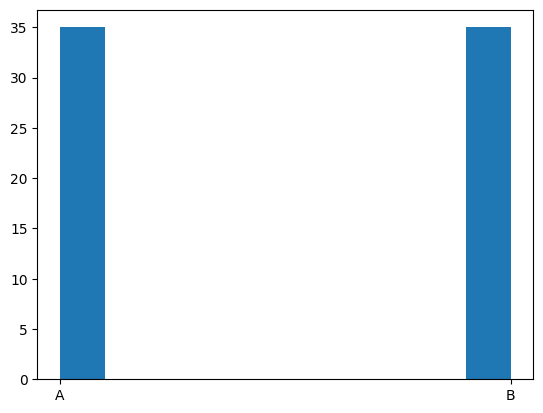

In [ ]:
plt.hist(df['Label'])

In [ ]:
df['Label']=df['Label'].apply(lambda x:0 if x=='A'else x)
df['Label']=df['Label'].apply(lambda x:1 if x=='B'else x)

karena sudah seimbang tidak perlu melakukan oversampling

In [ ]:
X = df.loc[:, df.columns!='Label']
y = df['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42,
                                                    shuffle=True)

Melakukan Normalisasi

In [ ]:
scaler = MinMaxScaler()
X_normalized_train = scaler.fit_transform(X_train)
X_normalized_test = scaler.fit_transform(X_test)

membuat model MLP menggunakan tensorflow

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(10,)),
        tf.keras.layers.Dense(20,activation='relu'),
        tf.keras.layers.Dense(20,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
]
)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
hasil_model =model.fit(X_normalized_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 2s 357ms/step - loss: 0.7360 - accuracy: 0.4091 - val_loss: 0.6879 - val_accuracy: 0.5833
Epoch 2/100
2/2 [==============================] - 0s 65ms/step - loss: 0.7277 - accuracy: 0.4091 - val_loss: 0.6824 - val_accuracy: 0.5833
Epoch 3/100
2/2 [==============================] - 0s 66ms/step - loss: 0.7216 - accuracy: 0.4091 - val_loss: 0.6780 - val_accuracy: 0.5833
Epoch 4/100
2/2 [==============================] - 0s 62ms/step - loss: 0.7149 - accuracy: 0.4091 - val_loss: 0.6743 - val_accuracy: 0.5833
Epoch 5/100
2/2 [==============================] - 0s 62ms/step - loss: 0.7090 - accuracy: 0.4091 - val_loss: 0.6715 - val_accuracy: 0.5833
Epoch 6/100
2/2 [==============================] - 0s 46ms/step - loss: 0.7042 - accuracy: 0.4091 - val_loss: 0.6692 - val_accuracy: 0.5833
Epoch 7/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6998 - accuracy: 0.4091 - val_loss: 0.6675 - val_accuracy: 0.5833
Epoch 8/100
2/2 [==

Melakukan prediksi dan mengevaluasi model

In [ ]:
y_pred=model.predict(X_normalized_test)
y_pred =(y_pred>0.5).astype(int).reshape(-1,)
y_pred

1/1 [==============================] - 0s 159ms/step


array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.714286
Precision: 0.500000
Recall: 0.750000
F1 score: 0.600000


In [ ]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)


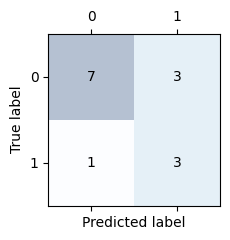

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

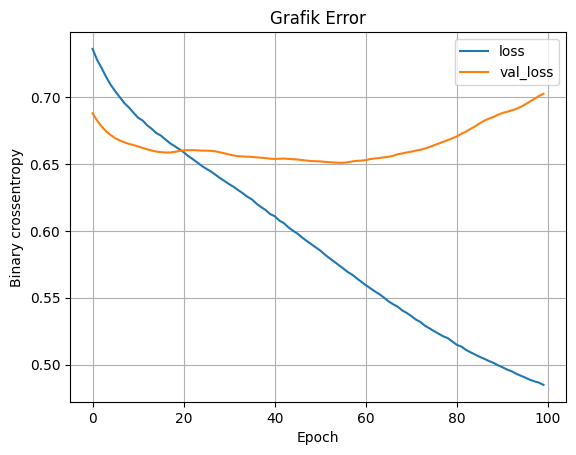

In [ ]:
plt.plot(hasil_model.history['loss'],label='loss')
plt.plot(hasil_model.history['val_loss'],label='val_loss')
plt.title('Grafik Error')
plt.xlabel('Epoch')
plt.ylabel('Binary crossentropy')
plt.legend()
plt.grid(True)
plt.show()

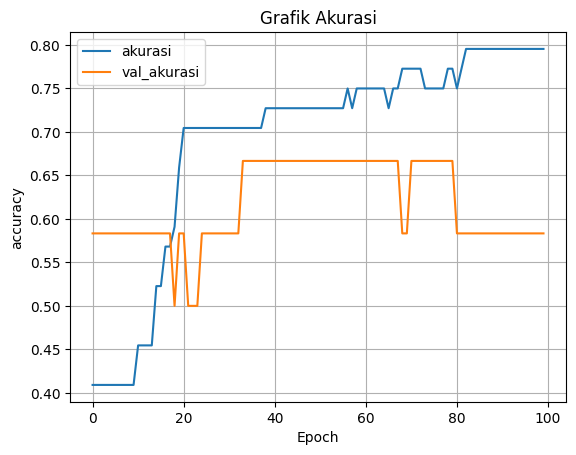

In [ ]:
plt.plot(hasil_model.history['accuracy'],label='akurasi')
plt.plot(hasil_model.history['val_accuracy'],label='val_akurasi')
plt.title('Grafik Akurasi')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
plt.show()

Membuat model yang akan digunakan buat hyperparameter

In [ ]:

def build_clf():
  # creating the layers of the NN
  model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(10,)),
        tf.keras.layers.Dense(20,activation='relu'),
        tf.keras.layers.Dense(20,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ]
    )
  model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
  return model

In [ ]:

Search=KerasClassifier(build_fn=build_clf,verbose=0)

kondisi yang digunakan untuk menentukan paramteter optimal adalah banyaknya iterasi model dan besarnya batch

In [ ]:

param_grid = {
              'batch_size': [10, 20, 30,40,50],
              'epochs': [ 200, 300,400]
              }
grid = GridSearchCV(estimator=Search, param_grid=param_grid,n_jobs=-1, scoring='accuracy', cv=2)
grid_result = grid.fit(X_normalized_train, y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
pred_grid = grid.predict(X_normalized_test)

In [ ]:
pred_grid =(pred_grid>0.5).astype(int).reshape(-1,)
pred_grid

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1])

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, pred_grid)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, pred_grid)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred_grid)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, pred_grid)
print('F1 score: %f' % f1)

Accuracy: 0.642857
Precision: 0.444444
Recall: 1.000000
F1 score: 0.615385


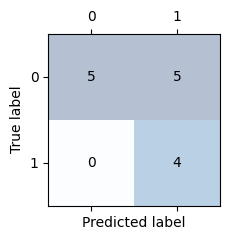

In [ ]:
confmat = confusion_matrix(y_true=y_test, y_pred=pred_grid)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [ ]:

best_params_grid=grid_result.best_params_
accuracy_grid=grid_result.best_score_

In [ ]:
print('params:',best_params_grid)
print('new accuracy:',accuracy_grid)

params: {'batch_size': 20, 'epochs': 400}
new accuracy: 0.6607142857142858


In [ ]:
cv_Rand = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
Search_Rand=KerasClassifier(build_fn=build_clf,verbose=0)

In [ ]:


search = RandomizedSearchCV(Search_Rand, param_grid, n_iter=2, cv=cv_Rand, random_state=1,verbose=20)
result = search.fit(X_normalized_train, y_train)

In [ ]:
pred_rand = search.predict(X_normalized_test)

In [ ]:
pred_rand =(pred_rand>0.5).astype(int).reshape(-1,)
pred_rand

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, pred_rand)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, pred_rand)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred_rand)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, pred_rand)
print('F1 score: %f' % f1)

Accuracy: 0.642857
Precision: 0.428571
Recall: 0.750000
F1 score: 0.545455


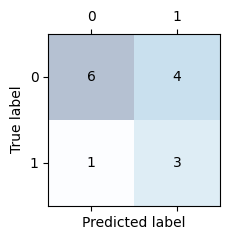

In [ ]:
confmat = confusion_matrix(y_true=y_test, y_pred=pred_rand)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

Kesimpulan<br>
model yang digunakan adalah model 3 layer MLP dari model tersebut menghasilkan akurasi yang bersekitar 70 persent. setelah dilakukan hyperparameter tuning menggunakan grid search dan random search dimana grid search mencari kombinasi parameter yang membantu mengembangkan model dan randomsearch melakukan hal yang sama hanya melalui randomisasi. hasil akurasi mereka menurun menjadi  sekitar 65 persent. alasan lebih kecil dari pada model pertama itu karena ada beberapa data pada model pertama mengalami overfitting, dengan hyperparameter data itu bisa dihapus untuk meningkatkan performa model meskipun mengurangi akurasi pada model.